In [21]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
# create a csv file to save data in
f = open('Countriestolivein2020.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(['Country', 'HDI', 'Population2020'])
# set page you want to visit
url = 'https://worldpopulationreview.com/country-rankings/worst-countries-to-live-in'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['td', 'th'])
        # ...get the data from each of the cells and save to variables
        Country = cells[0].text
        HumanDevelopmentIndex  = cells[1].text
        Population2020 = cells[2].text
       
        # ...collect all data in row called rowData
        rowData = [Country, HumanDevelopmentIndex, Population2020]
        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

In [2]:
df = pd.read_csv('Countriestolivein2020.csv')
df

,Country,HDI,Population2020
0,Country,Human Development Index,Population 2020
1,Niger,0.354,"24,206,644"
2,Central African Republic,0.367,"4,829,767"
3,South Sudan,0.388,"11,193,725"
4,Chad,0.404,"16,425,864"
...,...,...,...
185,Germany,0.936,"83,783,942"
186,Ireland,0.938,"4,937,786"
187,Australia,0.939,"25,499,884"
188,Switzerland,0.944,"8,654,622"


In [3]:
df1 = df.drop(df.index[0])
df1

,Country,HDI,Population2020
1,Niger,0.354,"24,206,644"
2,Central African Republic,0.367,"4,829,767"
3,South Sudan,0.388,"11,193,725"
4,Chad,0.404,"16,425,864"
5,Burundi,0.417,"11,890,784"
...,...,...,...
185,Germany,0.936,"83,783,942"
186,Ireland,0.938,"4,937,786"
187,Australia,0.939,"25,499,884"
188,Switzerland,0.944,"8,654,622"


In [39]:
# create a csv file to save data in
f = open('Countries_code2020.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(['Country', 'ISO Alpha-2 Code','ISO Alpha-3 Code','3 Digit Code'])
# set page you want to visit
url = 'https://worldpopulationreview.com/country-rankings/country-codes'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['td', 'th'])
        # ...get the data from each of the cells and save to variables
        Country = cells[0].text
        ISOAlpha_2Code  = cells[1].text
        ISOAlpha_3Code = cells[2].text
        DigitCode = cells[3].text
       
        # ...collect all data in row called rowData
        rowData = [Country, ISOAlpha_2Code,ISOAlpha_3Code ,DigitCode]
        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

In [4]:
df2 = pd.read_csv('Countries_code2020.csv')
df2

,Country,ISO Alpha-2 Code,ISO Alpha-3 Code,3 Digit Code
0,Country,ISO Alpha-2 Code,ISO Alpha-3 Code,3 Digit Code
1,Afghanistan,AF,AFG,4
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
228,Wallis And Futuna,WF,WLF,876
229,Western Sahara,EH,ESH,732
230,Yemen,YE,YEM,887
231,Zambia,ZM,ZMB,894


In [5]:
df3 = df2.drop(df.index[0])
df3

,Country,ISO Alpha-2 Code,ISO Alpha-3 Code,3 Digit Code
1,Afghanistan,AF,AFG,4
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
5,Andorra,AD,AND,20
...,...,...,...,...
228,Wallis And Futuna,WF,WLF,876
229,Western Sahara,EH,ESH,732
230,Yemen,YE,YEM,887
231,Zambia,ZM,ZMB,894


In [6]:
df4 = pd.merge(df1, df3, on='Country')
df4

,Country,HDI,Population2020,ISO Alpha-2 Code,ISO Alpha-3 Code,3 Digit Code
0,Niger,0.354,"24,206,644",NE,NER,562
1,Central African Republic,0.367,"4,829,767",CF,CAF,140
2,South Sudan,0.388,"11,193,725",SS,SSD,728
3,Chad,0.404,"16,425,864",TD,TCD,148
4,Burundi,0.417,"11,890,784",BI,BDI,108
...,...,...,...,...,...,...
184,Germany,0.936,"83,783,942",DE,DEU,276
185,Ireland,0.938,"4,937,786",IE,IRL,372
186,Australia,0.939,"25,499,884",AU,AUS,36
187,Switzerland,0.944,"8,654,622",CH,CHE,756


In [7]:
df4 = df4.drop(columns =['ISO Alpha-2 Code', '3 Digit Code'])
df4

,Country,HDI,Population2020,ISO Alpha-3 Code
0,Niger,0.354,"24,206,644",NER
1,Central African Republic,0.367,"4,829,767",CAF
2,South Sudan,0.388,"11,193,725",SSD
3,Chad,0.404,"16,425,864",TCD
4,Burundi,0.417,"11,890,784",BDI
...,...,...,...,...
184,Germany,0.936,"83,783,942",DEU
185,Ireland,0.938,"4,937,786",IRL
186,Australia,0.939,"25,499,884",AUS
187,Switzerland,0.944,"8,654,622",CHE


In [8]:
df4 = df4.rename({'ISO Alpha-3 Code':'Code'}, axis=1) 
df4

,Country,HDI,Population2020,Code
0,Niger,0.354,"24,206,644",NER
1,Central African Republic,0.367,"4,829,767",CAF
2,South Sudan,0.388,"11,193,725",SSD
3,Chad,0.404,"16,425,864",TCD
4,Burundi,0.417,"11,890,784",BDI
...,...,...,...,...
184,Germany,0.936,"83,783,942",DEU
185,Ireland,0.938,"4,937,786",IRL
186,Australia,0.939,"25,499,884",AUS
187,Switzerland,0.944,"8,654,622",CHE


In [125]:
df4.isnull().any()

Country           False
HDI               False
Population2020    False
Code              False
dtype: bool

In [57]:
# create a csv file to save data in
f = open('Africa.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(['Rank','Country', 'Population', 'Growth_Rate', 'Area'])
# set page you want to visit
url = 'https://worldpopulationreview.com/country-rankings/countries-in-africa'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['td', 'th'])
        # ...get the data from each of the cells and save to variables
        Rank = cells[0].text
        Country  = cells[1].text
        Population2020 = cells[2].text
        Growth_Rate = cells[3].text
        Area = cells[4].text
       
        # ...collect all data in row called rowData
        rowData = [Rank, Country, Population2020, Growth_Rate, Area]
        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

In [9]:
Africans = pd.read_csv('Africa.csv')
#Africans

In [10]:
Africans = Africans.drop(df.index[0])
#Africans

In [351]:
African_index = pd.merge(df4, Africans, on='Country')
African_index = African_index .drop(columns =['Rank', 'Area','Population'])
African_index.head() 

,Country,HDI,Population2020,Code,Growth_Rate
0,Niger,0.354,"24,206,644",NER,3.84%
1,Central African Republic,0.367,"4,829,767",CAF,1.78%
2,South Sudan,0.388,"11,193,725",SSD,1.19%
3,Chad,0.404,"16,425,864",TCD,3.00%
4,Burundi,0.417,"11,890,784",BDI,3.12%


In [26]:
African_index['HDI'] = pd.to_numeric(African_index['HDI'], errors = 'ignore')
African_index["Population2020"] = African_index["Population2020"].str.replace(',', '')
African_index["Population2020"] = pd.to_numeric(African_index["Population2020"], errors ='ignore')
African_index["Growth_Rate"] = African_index["Growth_Rate"].str.replace('%', '')
African_index["Growth_Rate"] = pd.to_numeric(African_index["Growth_Rate"], errors = 'ignore')  
African_index.head()

,Country,HDI,Population2020,Code,Growth_Rate
0,Niger,0.354,24206644,NER,3.84
1,Central African Republic,0.367,4829767,CAF,1.78
2,South Sudan,0.388,11193725,SSD,1.19
3,Chad,0.404,16425864,TCD,3.00
4,Burundi,0.417,11890784,BDI,3.12


In [35]:
from scipy.stats import pearsonr
import numpy as np
from scipy import stats
afriHDI = np.array(African_index.HDI)
pop2020 = np.array(African_index.Population2020)
stats.pearsonr(afriHDI,pop2020)

(-0.004196302300187742, 0.9762096567927059)

In [38]:
#Best 10 countries in Africa to live in according to UN's HDI
African_10 = African_index.sort_values(["HDI"], axis=0, ascending=False)[:10]
African_10

,Country,HDI,Population2020,Code,Growth_Rate
52,Seychelles,0.797,98347,SYC,0.62
51,Mauritius,0.790,1271768,MUS,0.17
50,Algeria,0.754,43851044,DZA,1.85
49,Tunisia,0.735,11818619,TUN,1.06
48,Botswana,0.717,2351627,BWA,2.08
47,Libya,0.706,6871292,LBY,1.39
46,Gabon,0.702,2225734,GAB,2.45
45,South Africa,0.699,59308690,ZAF,1.28
44,Egypt,0.696,102334404,EGY,1.94
43,Morocco,0.667,36910560,MAR,1.20


In [173]:
fig = go.Figure(data=go.Choropleth(
      locations = African_index.Code,
    z = African_index.HDI,
    text = African_index.Country,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in some African Countries',
    geo_scope='africa'), 
annotations = [dict(
        
        text='Source: <a href="https://worldpopulationreview.com/country-rankings/countries-in-africa">\
            World Population Review</a>',
        showarrow = False)]

    
fig.show()

In [344]:
#px.choropleth(African_index,locations="Code",color='HDI',hover_name='Country', range_color=(0,0.8),scope='africa', color_continuous_scale='Plasma',title = '2020 HDI variations in some African Countries')

In [259]:
fig = px.scatter(African_index, x= African_index.Population2020, y= African_index.HDI,log_x = True,color_continuous_scale = 'Plasma',hover_name= 'Country', color='Growth_Rate',text="Country",title = "African Countries' HDIs vs Population in 2020")
fig.update_traces(textposition='top center')
fig.show()

In [178]:
fig = px.scatter(African_index, x= African_index.Growth_Rate, y= African_index.HDI,color_continuous_scale = 'Plasma',text= 'Country', color='Population2020', title = 'HDI vs Growth Rate for African Countries, 2020 status')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [199]:
fig = px.scatter(African_index, x= African_index.Population2020, y= African_index.Growth_Rate,text ='Country',log_x=True, color_continuous_scale = 'Plasma',hover_name= 'Country', color='HDI',title = "African Countries' Growth_Rate vs 2020 population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [346]:
African_10GR8 = African_10.sort_values(["HDI"], axis=0, ascending=False)
African_10GR8

,Country,HDI,Population2020,Code,Growth_Rate
52,Seychelles,0.797,98347,SYC,0.62
51,Mauritius,0.790,1271768,MUS,0.17
50,Algeria,0.754,43851044,DZA,1.85
49,Tunisia,0.735,11818619,TUN,1.06
48,Botswana,0.717,2351627,BWA,2.08
47,Libya,0.706,6871292,LBY,1.39
46,Gabon,0.702,2225734,GAB,2.45
45,South Africa,0.699,59308690,ZAF,1.28
44,Egypt,0.696,102334404,EGY,1.94
43,Morocco,0.667,36910560,MAR,1.20


In [261]:
fig = px.scatter(African_10, x= African_10.Population2020, y= African_10.HDI,text ='Country', color_continuous_scale = 'Plasma',hover_name= 'Country', color='Growth_Rate',title = "Countries with top 10 HDIs in Africa vs Population, as at 2020")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [75]:
# create a csv file to save data in
f = open('Asia.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(['Rank','Country', 'Population', 'Growth_Rate'])
# set page you want to visit
url = 'https://worldpopulationreview.com/country-rankings/countries-in-asia'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['td', 'th'])
        # ...get the data from each of the cells and save to variables
        Rank = cells[0].text
        Country  = cells[1].text
        Population2020 = cells[2].text
        Growth_Rate = cells[3].text
        
       
        # ...collect all data in row called rowData
        rowData = [Rank, Country, Population2020, Growth_Rate]
        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

Asians = pd.read_csv('Asia.csv')
Asians = Asians.drop(df.index[0])
Asians_index = pd.merge(df4, Asians, on='Country')
Asians_index = Asians_index .drop(columns =['Rank','Population'])
Asians_index.head()


,Country,HDI,Population2020,Code,Growth_Rate
0,Yemen,0.452,"29,825,964",YEM,2.28%
1,Afghanistan,0.498,"38,928,346",AFG,2.33%
2,Syria,0.536,"17,500,658",SYR,2.52%
3,Pakistan,0.562,"220,892,340",PAK,2.00%
4,Nepal,0.574,"29,136,808",NPL,1.85%
5,Myanmar,0.578,"54,409,800",MMR,0.67%
6,Cambodia,0.582,"16,718,965",KHM,1.41%
7,Laos,0.601,"7,275,560",LAO,1.48%
8,Bangladesh,0.608,"164,689,383",BGD,1.01%
9,Bhutan,0.612,"771,608",BTN,1.12%


In [53]:
Asians = pd.read_csv('Asia.csv')
Asians = Asians.drop(df.index[0])
Asians_index = pd.merge(df4, Asians, on='Country') 
Asians_index = Asians_index .drop(columns =['Rank','Population'])
#Asians_index

In [85]:
Asians_index['HDI'] = pd.to_numeric(Asians_index['HDI'], errors = 'ignore')
Asians_index["Population2020"] = Asians_index["Population2020"].str.replace(',', '')
Asians_index["Population2020"] = pd.to_numeric(Asians_index["Population2020"], errors ='ignore')
Asians_index["Growth_Rate"] = Asians_index["Growth_Rate"].str.replace('%', '')
Asians_index["Growth_Rate"] = pd.to_numeric(Asians_index["Growth_Rate"], errors = 'ignore')  
Asians_index.head()

,Country,HDI,Population2020,Code,Growth_Rate
0,Yemen,0.452,29825964,YEM,2.28
1,Afghanistan,0.498,38928346,AFG,2.33
2,Syria,0.536,17500658,SYR,2.52
3,Pakistan,0.562,220892340,PAK,2.00
4,Nepal,0.574,29136808,NPL,1.85


In [322]:
Asians_index["Population2020"].describe()

count    4.700000e+01
mean     9.765112e+07
std      2.855670e+08
min      4.374790e+05
25%      5.478484e+06
50%      1.671896e+07
75%      5.283949e+07
max      1.439324e+09
Name: Population2020, dtype: float64

In [320]:
fig = px.scatter(Asians_index, x= Asians_index.Population2020, y= Asians_index.HDI,color_continuous_scale = 'Plasma',text ='Country',log_x=True, hover_name= 'Country', color='Growth_Rate',title = "Asian Countries' HDIs vs Population, 2020 status")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [159]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
      locations = Asians_index.Code,
    z = Asians_index.HDI,
    text = Asians_index.Country,
    colorscale = 'Blues',
    #hover_data=['Country','Growth_Rate'],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '',
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in some Asian Countries',
    geo_scope='asia', 
)
 annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
fig.show()

In [86]:
#Best 10 countries in Asia to live in according to UN's HDI
Asians_10 = Asians_index.sort_values(["HDI"], axis=0, ascending=False)[:10]
Asians_10

,Country,HDI,Population2020,Code,Growth_Rate
46,Hong Kong,0.933,7496981,HKG,0.82
45,Singapore,0.932,5850342,SGP,0.79
44,Japan,0.909,126476461,JPN,-0.30
43,Israel,0.903,8655535,ISR,1.60
42,South Korea,0.903,51269185,KOR,0.09
41,United Arab Emirates,0.863,9890402,ARE,1.23
40,Qatar,0.856,2881053,QAT,1.73
39,Brunei,0.853,437479,BRN,0.97
38,Saudi Arabia,0.853,34813871,SAU,1.59
37,Bahrain,0.846,1701575,BHR,3.68


In [257]:
#visualizing probable correlation between HDI and population, the size of the points is a function of their 2020 Growth_Rates 
fig = px.scatter(Asians_10, x= Asians_10.Population2020, y= Asians_10.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = 'Asian Countries with top 10 HDIs vs 2020 Population')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show() 

In [74]:
# create a csv file to save data in
f = open('Europe.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(['Country', 'Population', 'Growth_Rate'])
# set page you want to visit
url = 'https://worldpopulationreview.com/country-rankings/countries-in-europe'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['td', 'th'])
        # ...get the data from each of the cells and save to variables
        
        Country  = cells[0].text
        Population2020 = cells[1].text
        Growth_Rate = cells[2].text
        
       
        # ...collect all data in row called rowData
        rowData = [Country, Population2020, Growth_Rate]
        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

Europa = pd.read_csv('Europe.csv')
Europa = Europa.drop(df.index[0])
Europa_index = pd.merge(df4, Europa, on='Country')
 
Europa_index = Europa_index .drop(columns =['Population'])
Europa_index


,Country,HDI,Population2020,Code,Growth_Rate
0,Moldova,0.7,"4,033,963",MDA,-0.23%
1,Ukraine,0.751,"43,733,762",UKR,-0.59%
2,Armenia,0.755,"2,963,243",ARM,0.19%
3,Azerbaijan,0.757,"10,139,177",AZE,0.91%
4,Macedonia,0.757,"2,083,374",MKD,-0.00%
5,Bosnia And Herzegovina,0.768,"3,280,819",BIH,-0.61%
6,Georgia,0.78,"3,989,167",GEO,-0.19%
7,Albania,0.785,"2,877,797",ALB,-0.11%
8,Serbia,0.787,"8,737,371",SRB,-0.40%
9,Turkey,0.791,"84,339,067",TUR,1.09%


In [102]:
Europa = pd.read_csv('Europe.csv')
Europa = Europa.drop(df.index[0])
Europa_index = pd.merge(df4, Europa, on='Country')
Europa_index = Europa_index .drop(columns =['Population'])

Europa_index['HDI'] = pd.to_numeric(Europa_index['HDI'], errors = 'ignore')
Europa_index["Population2020"] = Europa_index["Population2020"].str.replace(',', '')
Europa_index["Population2020"] = pd.to_numeric(Europa_index["Population2020"], errors ='ignore')
Europa_index["Growth_Rate"] = Europa_index["Growth_Rate"].str.replace('%', '')
Europa_index["Growth_Rate"] = pd.to_numeric(Europa_index["Growth_Rate"], errors = 'ignore')  
Europa_index.head()

,Country,HDI,Population2020,Code,Growth_Rate
0,Moldova,0.700,4033963,MDA,-0.23
1,Ukraine,0.751,43733762,UKR,-0.59
2,Armenia,0.755,2963243,ARM,0.19
3,Azerbaijan,0.757,10139177,AZE,0.91
4,Macedonia,0.757,2083374,MKD,-0.00


In [114]:
fig = go.Figure(data=go.Choropleth(
      locations = Europa_index.Code,
    z = Europa_index.HDI,
    text = Europa_index.Country,
    colorscale = 'Reds',
    #hover_data=['Country','Growth_Rate'],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '',
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in some European Countries',
    geo_scope='europe', 
)

fig.show()

In [324]:
#Best 10 countries in Europe to live in according to UN's HDI
European_10 =Europa_index.sort_values(["HDI"], axis=0, ascending=False)[:10]
European_10

,Country,HDI,Population2020,Code,Growth_Rate
46,Norway,0.953,5421241,NOR,0.79
45,Switzerland,0.944,8654622,CHE,0.74
44,Ireland,0.938,4937786,IRL,1.13
43,Germany,0.936,83783942,DEU,0.32
42,Iceland,0.935,341243,ISL,0.65
41,Sweden,0.933,10099265,SWE,0.63
40,Netherlands,0.931,17134872,NLD,0.22
39,Denmark,0.929,5792202,DNK,0.35
38,United Kingdom,0.922,67886011,GBR,0.53
37,Finland,0.920,5540720,FIN,0.15


In [220]:
fig = px.scatter(Europa_index, x= Europa_index.Population2020, y= Europa_index.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "European Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [326]:
#visualizing probable correlation between HDI and population, the size of the points is a function of their 2020 Growth_Rates 
fig = px.scatter(European_10, x= European_10.Population2020, y= European_10.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "Top 10 European Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=500,)
fig.show()

In [73]:
f = open('South_America.csv', 'w', encoding='utf8', newline='')
writer = csv.writer(f, delimiter=',')
writer.writerow(['Rank','Country', 'Population', 'Growth_Rate'])
url = 'https://worldpopulationreview.com/country-rankings/countries-in-south-america'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table')
for row in table.find_all('tr'):
        cells = row.find_all(['td', 'th'])
        Rank = cells[0].text
        Country  = cells[1].text
        Population2020 = cells[2].text
        Growth_Rate = cells[3].text
        
       
        rowData = [Rank, Country, Population2020, Growth_Rate]
        writer.writerow(rowData)
        

f.close()

South_Americans = pd.read_csv('South_America.csv')
South_Americans = South_Americans.drop(df.index[0])
South_Americans_index = pd.merge(df4, South_Americans, on='Country')
 
South_Americans_index = South_Americans_index .drop(columns =['Rank','Population'])
South_Americans_index


,Country,HDI,Population2020,Code,Growth_Rate
0,Guyana,0.654,"786,552",GUY,0.48%
1,Bolivia,0.693,"11,673,021",BOL,1.39%
2,Paraguay,0.702,"7,132,538",PRY,1.25%
3,Suriname,0.72,"586,632",SUR,0.91%
4,Colombia,0.747,"50,882,891",COL,1.08%
5,Peru,0.75,"32,971,854",PER,1.42%
6,Ecuador,0.752,"17,643,054",ECU,1.55%
7,Brazil,0.759,"212,559,417",BRA,0.71%
8,Venezuela,0.761,"28,435,940",VEN,-0.28%
9,Uruguay,0.804,"3,473,730",URY,0.35%


In [210]:
South_Americans = pd.read_csv('South_America.csv')
South_Americans = South_Americans.drop(df.index[0])
South_Americans_index = pd.merge(df4, South_Americans, on='Country')
South_Americans_index = South_Americans_index .drop(columns =['Rank','Population'])

South_Americans_index['HDI'] = pd.to_numeric(South_Americans_index['HDI'], errors = 'ignore')
South_Americans_index["Population2020"] = South_Americans_index["Population2020"].str.replace(',', '')
South_Americans_index["Population2020"] = pd.to_numeric(South_Americans_index["Population2020"], errors ='ignore')
South_Americans_index["Growth_Rate"] = South_Americans_index["Growth_Rate"].str.replace('%', '')
South_Americans_index["Growth_Rate"] = pd.to_numeric(South_Americans_index["Growth_Rate"], errors = 'ignore')  
South_Americans_index.head()

,Country,HDI,Population2020,Code,Growth_Rate
0,Guyana,0.654,786552,GUY,0.48
1,Bolivia,0.693,11673021,BOL,1.39
2,Paraguay,0.702,7132538,PRY,1.25
3,Suriname,0.720,586632,SUR,0.91
4,Colombia,0.747,50882891,COL,1.08


In [339]:
fig = go.Figure(data=go.Choropleth(
      locations = South_Americans_index.Code,
    z = South_Americans_index.HDI,
    text = South_Americans_index.Country,
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in South America',
    geo_scope='south america', 
)

fig.show()

In [221]:
fig = px.scatter(South_Americans_index, x= South_Americans_index.Population2020, y= South_Americans_index.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "South American Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [225]:
#Best 6 countries in South America to live in according to UN's HDI
South_Americans_6 = South_Americans_index.sort_values(["HDI"], axis=0, ascending=False)[:6]
South_Americans_6

,Country,HDI,Population2020,Code,Growth_Rate
11,Chile,0.843,19116201,CHL,0.87
10,Argentina,0.825,45195774,ARG,0.93
9,Uruguay,0.804,3473730,URY,0.35
8,Venezuela,0.761,28435940,VEN,-0.28
7,Brazil,0.759,212559417,BRA,0.71
6,Ecuador,0.752,17643054,ECU,1.55


In [254]:
fig = px.scatter(South_Americans_6, x= South_Americans_6.Population2020, y= South_Americans_6.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "Top 6 South American Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [72]:
f = open('North_America.csv', 'w', encoding='utf8', newline='')
writer = csv.writer(f, delimiter=',')
writer.writerow(['Rank','Country', 'Population', 'Growth_Rate'])
url = 'https://worldpopulationreview.com/country-rankings/countries-in-north-america'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table')

for row in table.find_all('tr'):
        cells = row.find_all(['td', 'th'])
        Rank = cells[0].text
        Country  = cells[1].text
        Population2020 = cells[2].text
        Growth_Rate = cells[3].text
        
       
        rowData = [Rank, Country, Population2020, Growth_Rate]
        writer.writerow(rowData)
        

f.close()

North_Americans = pd.read_csv('North_America.csv')
North_Americans = North_Americans.drop(df.index[0])
North_Americans_index = pd.merge(df4, North_Americans, on='Country')
 
North_Americans_index = North_Americans_index .drop(columns =['Rank', 'Population'])
North_Americans_index


,Country,HDI,Population2020,Code,Growth_Rate
0,Haiti,0.498,"11,402,528",HTI,1.24%
1,Honduras,0.617,"9,904,607",HND,1.63%
2,Guatemala,0.65,"17,915,568",GTM,1.90%
3,Nicaragua,0.658,"6,624,554",NIC,1.21%
4,El Salvador,0.674,"6,486,205",SLV,0.51%
5,Belize,0.708,"397,628",BLZ,1.86%
6,Saint Vincent And The Grenadines,0.723,"110,940",VCT,0.32%
7,Jamaica,0.732,"2,961,167",JAM,0.44%
8,Saint Lucia,0.747,"183,627",LCA,0.46%
9,Grenada,0.772,"112,523",GRD,0.46%


In [215]:
North_Americans = pd.read_csv('North_America.csv')
North_Americans = North_Americans.drop(df.index[0])
North_Americans_index = pd.merge(df4, North_Americans, on='Country')
North_Americans_index = North_Americans_index .drop(columns =['Rank', 'Population'])


North_Americans_index['HDI'] = pd.to_numeric(North_Americans_index['HDI'], errors = 'ignore')
North_Americans_index["Population2020"] = North_Americans_index["Population2020"].str.replace(',', '')
North_Americans_index["Population2020"] = pd.to_numeric(North_Americans_index["Population2020"], errors ='ignore')
North_Americans_index["Growth_Rate"] = North_Americans_index["Growth_Rate"].str.replace('%', '')
North_Americans_index["Growth_Rate"] = pd.to_numeric(North_Americans_index["Growth_Rate"], errors = 'ignore')  

fig = go.Figure(data=go.Choropleth(
      locations = North_Americans_index.Code,
    z = North_Americans_index.HDI,
    text = North_Americans_index.Country,
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in some North Americans Countries',
    geo_scope='north america', 
)

fig.show()

In [340]:
fig = px.scatter(North_Americans_index, x= North_Americans_index.Population2020, y= North_Americans_index.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "North American Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [230]:
#Best 6 countries in North America to live in according to UN's HDI
North_Americans_10 = North_Americans_index.sort_values(["HDI"], axis=0, ascending=False)[:10]
North_Americans_10

,Country,HDI,Population2020,Code,Growth_Rate
20,Canada,0.926,37742154,CAN,0.89
19,United States,0.924,331002651,USA,0.59
18,Bahamas,0.807,393244,BHS,0.97
17,Barbados,0.800,287375,BRB,0.12
16,Costa Rica,0.794,5094118,CRI,0.92
15,Panama,0.789,4314767,PAN,1.61
14,Trinidad And Tobago,0.784,1399488,TTO,0.32
13,Antigua And Barbuda,0.780,97929,ATG,0.83
12,Saint Kitts And Nevis,0.778,53199,KNA,0.71
11,Cuba,0.777,11326616,CUB,-0.06


In [253]:
fig = px.scatter(North_Americans_10, x= North_Americans_10.Population2020, y= North_Americans_10.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "Top 10 North American Countries' HDI vs 2020 Population")
fig.update_traces(textposition='top center')  
fig.update_layout(
    height=600,)
fig.show()

In [71]:
f = open('Oceania.csv', 'w', encoding='utf8', newline='')
writer = csv.writer(f, delimiter=',')
writer.writerow(['Rank','Country', 'Population', 'Growth_Rate'])
url = 'https://worldpopulationreview.com/country-rankings/countries-in-oceania'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table')

for row in table.find_all('tr'):
        
        cells = row.find_all(['td', 'th'])       
        Rank = cells[0].text
        Country  = cells[1].text
        Population2020 = cells[2].text
        Growth_Rate = cells[3].text       
        rowData = [Rank, Country, Population2020, Growth_Rate]
        writer.writerow(rowData)
        

f.close()

Oceanians = pd.read_csv('Oceania.csv')
Oceanians = Oceanians.drop(df.index[0])
Oceanians_index = pd.merge(df4, Oceanians, on='Country')
 
Oceanians_index = Oceanians_index .drop(columns =['Rank','Population'])
Oceanians_index

,Country,HDI,Population2020,Code,Growth_Rate
0,Papua New Guinea,0.544,"8,947,024",PNG,1.95%
1,Solomon Islands,0.546,"686,884",SLB,2.55%
2,Vanuatu,0.603,"307,145",VUT,2.42%
3,Kiribati,0.612,"119,449",KIR,1.57%
4,Micronesia,0.627,"115,023",FSM,1.06%
5,Marshall Islands,0.708,"59,190",MHL,0.68%
6,Samoa,0.713,"198,414",WSM,0.67%
7,Tonga,0.726,"105,695",TON,1.15%
8,Fiji,0.741,"896,445",FJI,0.73%
9,Palau,0.798,"18,094",PLW,0.48%


In [218]:
Oceanians = pd.read_csv('Oceania.csv')
Oceanians = Oceanians.drop(df.index[0])
Oceanians_index = pd.merge(df4, Oceanians, on='Country')
Oceanians_index = Oceanians_index .drop(columns =['Rank','Population'])

Oceanians_index['HDI'] = pd.to_numeric(Oceanians_index['HDI'], errors = 'ignore')
Oceanians_index["Population2020"] = Oceanians_index["Population2020"].str.replace(',', '')
Oceanians_index["Population2020"] = pd.to_numeric(Oceanians_index["Population2020"], errors ='ignore')
Oceanians_index["Growth_Rate"] = Oceanians_index["Growth_Rate"].str.replace('%', '')
Oceanians_index["Growth_Rate"] = pd.to_numeric(Oceanians_index["Growth_Rate"], errors = 'ignore')  

fig = go.Figure(data=go.Choropleth(
      locations = Oceanians_index.Code,
    z = Oceanians_index.HDI,
    text = Oceanians_index.Country,
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = '2020 HDI variations in some Oceania Countries',
    geo_scope='world', 
)

fig.show()

In [263]:
fig = px.scatter(Oceanians_index, x= Oceanians_index.Population2020, y= Oceanians_index.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country',log_x=True, title = "Oceanian Countries' HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [265]:
#Best 6 countries in South America to live in according to UN's HDI
Oceanians_best = Oceanians_index.sort_values(["HDI"], axis=0, ascending=False)[:6]
Oceanians_best

,Country,HDI,Population2020,Code,Growth_Rate
11,Australia,0.939,25499884,AUS,1.18
10,New Zealand,0.917,4822233,NZL,0.82
9,Palau,0.798,18094,PLW,0.48
8,Fiji,0.741,896445,FJI,0.73
7,Tonga,0.726,105695,TON,1.15
6,Samoa,0.713,198414,WSM,0.67


In [234]:
Oceanians_index.nunique()

Country           12
HDI               12
Population2020    12
Code              12
Growth_Rate       12
dtype: int64

In [238]:
#df3
worldCountries = df3.drop(columns=['ISO Alpha-2 Code','ISO Alpha-3 Code','3 Digit Code'])
worldCountries

,Country
1,Afghanistan
2,Albania
3,Algeria
4,American Samoa
5,Andorra
...,...
228,Wallis And Futuna
229,Western Sahara
230,Yemen
231,Zambia


In [350]:
worldBestCountries = pd.concat([African_10, Asians_10,European_10,South_Americans_6,North_Americans_10,Oceanians_best], axis=0)
worldBestCountries=worldBestCountries.reset_index(drop=True)  
worldBestCountries.head() 

,Country,HDI,Population2020,Code,Growth_Rate
0,Seychelles,0.797,98347,SYC,0.62
1,Mauritius,0.790,1271768,MUS,0.17
2,Algeria,0.754,43851044,DZA,1.85
3,Tunisia,0.735,11818619,TUN,1.06
4,Botswana,0.717,2351627,BWA,2.08


In [329]:
fig = go.Figure(data=go.Choropleth(
      locations = worldBestCountries.Code,
    z = worldBestCountries.HDI,
    text = worldBestCountries.Country,
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HDI Variations',
))

fig.update_layout(
    title_text = 'Top Countries with best HDIs to consider for migrations',
    geo_scope='world', 
)

fig.show()

(0.2, 1)

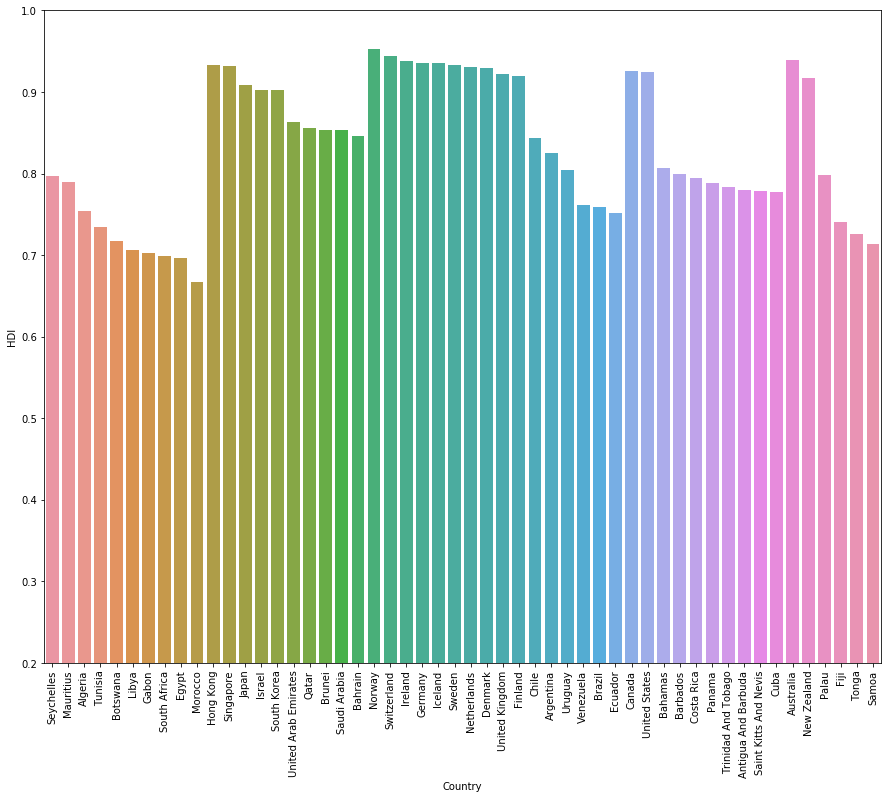

In [330]:
import seaborn as sns
plt.figure(figsize=(15,12))
plt.xticks(rotation = 90)
plt.xlabel("Item")
g = sns.barplot(data=worldBestCountries, x="Country", y= "HDI")
#g.set_yscale("log")
g.set_ylim(0.2, 1)

In [331]:
fig = px.scatter(worldBestCountries, x= worldBestCountries.Country, y= worldBestCountries.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country', title = "Top Countries of the world with HDIs")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width= 1000)
fig.show()

In [332]:
worldBestHDIs = worldBestCountries.sort_values(["HDI"], axis=0, ascending=False)[:10]
worldBestHDIs

,Country,HDI,Population2020,Code,Growth_Rate
20,Norway,0.953,5421241,NOR,0.79
21,Switzerland,0.944,8654622,CHE,0.74
46,Australia,0.939,25499884,AUS,1.18
22,Ireland,0.938,4937786,IRL,1.13
23,Germany,0.936,83783942,DEU,0.32
24,Iceland,0.935,341243,ISL,0.65
25,Sweden,0.933,10099265,SWE,0.63
10,Hong Kong,0.933,7496981,HKG,0.82
11,Singapore,0.932,5850342,SGP,0.79
26,Netherlands,0.931,17134872,NLD,0.22


In [333]:
worldBestCountries.corr() 

,HDI,Population2020,Growth_Rate
HDI,1.000000,0.087874,-0.287327
Population2020,0.087874,1.000000,-0.123115
Growth_Rate,-0.287327,-0.123115,1.000000


In [334]:
import numpy as np
from scipy import stats
wordBestHDI = np.array(worldBestCountries.HDI)
wordBestHDIpop= np.array(worldBestCountries.Population2020)
stats.pearsonr(wordBestHDI,wordBestHDIpop)

(0.08787443167388025, 0.5356082374661496)

In [335]:
wordBestHDI = np.array(worldBestCountries.HDI)
wordBestHDIgR = np.array(worldBestCountries.Growth_Rate)
stats.pearsonr(wordBestHDI,wordBestHDIgR)

(-0.28732660706580304, 0.038890070950976)

In [342]:
fig = px.scatter(worldBestCountries, x= worldBestCountries.Growth_Rate, y= worldBestCountries.HDI,color_continuous_scale = 'Viridis', color='Population2020',text ='Country', title = "Top Countries of the world with HDIs vs Growth Rate")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width= 1000)
fig.show()

In [337]:
fig = px.scatter(worldBestCountries, x= worldBestCountries.Population2020, y= worldBestCountries.HDI,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country', title = "Top Countries of the world with HDIs vs 2020 Population")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width= 1000)
fig.show()

In [343]:
fig = px.scatter(worldBestCountries, x= worldBestCountries.Population2020, y= worldBestCountries.Growth_Rate,color_continuous_scale = 'Viridis', color='Growth_Rate',text ='Country', title = "Top Countries of the world with HDIs")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width= 1000)
fig.show()